# Machine Learning LAB 3
# IMAGE CLASSIFICATION WITH NEURAL NETWORKS
Course 2022/23: P. Zanuttigh, F. Barbato, M. Mel

The notebook contains some simple tasks to be performed with **NEURAL NETWORKS (NNs)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use [**Fashion MNIST**](https://github.com/zalandoresearch/fashion-mnist), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
# load the required packages and check Scikit-learn version
%matplotlib inline  

import numpy as np
from matplotlib import pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#from sklearnex import patch_sklearn # if you have an Intel CPU and have installed the Intel MKL 
#patch_sklearn()                     # library you can uncomment these lines for a speedup

scikit-learn version:  1.1.3


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB3.ipynb**

**Student name**: Alessandro Discalzi<br>
**ID Number**: 2088235

# A) Hyperparameter Search

**TO DO A.0:** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: `ID = 1234567 + 1`.

In [3]:
ID = 2088235
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset**. <br>
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [4]:
# load the MNIST dataset
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data to [0, 1]
X = X / 255.0

Number of samples in the MNIST dataset: 60000


**TO DO A.1:** **Divide** the **data into training and test set** using a **500** samples in the **training set**. <br>
Make sure that **each label** is present at **least 10 times** in training frequencies.

In [5]:
# randomly permute the data and split into training and test taking 
# the first 500 data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[0:m_training], X[m_training:]
y_train, y_test = y[0:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True) 
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [58 40 46 44 46 63 50 58 46 49]


In [6]:
# function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


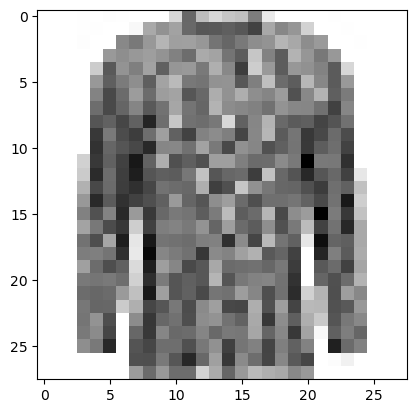

LABEL: 2
INPUT:


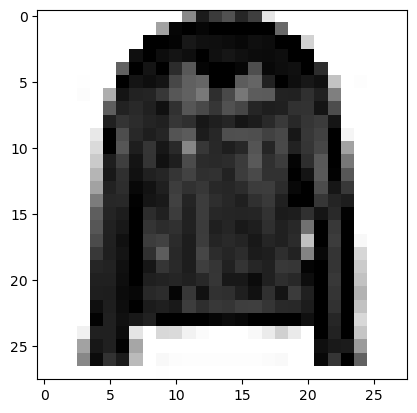

LABEL: 4
INPUT:


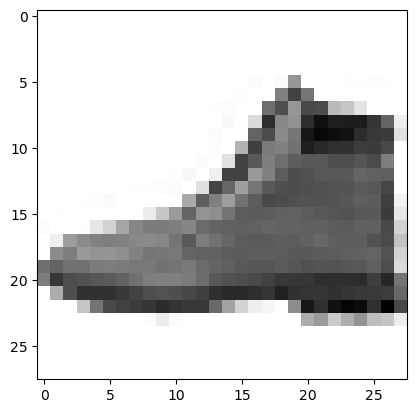

LABEL: 9


In [7]:
# let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

**TO DO A.2** Now **use a feed-forward Neural Network** for prediction. <br><br>
Use the **multi-layer perceptron** classifier, with the following parameters: <br>
`max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID` <br>
The `random_state` parameter ensures the run is the same even if you run it more than once, while the `alpha` parameter is the regularization term.<br>
You might get some **warnings about the convergence**, ignore them (or try to increase the max_iter parameter if you have a powerful computer). <br>

Then, using the default activation function, **pick four or five architectures** to consider, with different numbers of hidden layers and different sizes. <br>
It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. <br>
Evaluate the architectures you chose using **GridSearchCV with cv=5**. <br>

You can reduce the number of iterations if the running time is too long on your computer.

In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (25,), (28,), (50,), (56,), (80,), (25,10,), (28,28,), (56,14,), (56,28,), (28,28,10), (28,28,28), (50,25,10), (56,28,14), (100,10,10)]}

#Maxiter changed to 1000
mlp = MLPClassifier(max_iter=1000, alpha=0.0001, solver='sgd', tol=0.0001, learning_rate_init=.1, random_state=ID)

mlp_arch_CV = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1, verbose=1)
mlp_arch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found: ")
print(mlp_arch_CV.best_params_)

print("Score with best parameters: ")
print(mlp_arch_CV.best_score_)

print("\nMean scores on the grid: ")
print(mlp_arch_CV.cv_results_['mean_test_score'])

Fitting 5 folds for each of 15 candidates, totalling 75 fits
RESULTS FOR NN

Best parameters set found: 
{'hidden_layer_sizes': (28,)}
Score with best parameters: 
0.784

Mean scores on the grid: 
[0.772 0.772 0.784 0.776 0.77  0.782 0.632 0.774 0.744 0.762 0.39  0.502
 0.506 0.602 0.696]


**TO DO A.3** Now **try different batch sizes**, while keeping the **best NN** architecture you have found above. <br>
Remember that the batch size was previously set to the default value, i.e., `min(200, n_samples)`. <br>

Recall that a **batch size of 1 corresponds to baseline SGD**, while using all the **400 training samples** (there are 500 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to **standard GD** and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 100, 150, 200, 250, 300, 400]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
#suggestion: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
#Using the default number of splits (5)
kf = sklearn.model_selection.KFold(n_splits=5)
best_hidden_layer_sizes = (28,)
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=1000, alpha=0.0001, solver='sgd', tol=0.0001, learning_rate_init=.1, random_state=ID)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp_batch_CV = GridSearchCV(mlp, parameters, cv=kf, n_jobs=-1, verbose=1)
mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found: ")
print(mlp_batch_CV.best_params_)

print("Score with best parameters:")
print(mlp_batch_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_batch_CV.cv_results_['mean_test_score'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
RESULTS FOR NN

Best parameters set found: 
{'batch_size': 200}
Score with best parameters:
0.7859999999999999

All scores on the grid:
[0.094 0.726 0.768 0.77  0.786 0.772 0.782 0.772]


**TO DO A.Q1**

- What do you observe for different architectures and batch sizes? <br>
- How do the number of layers and their sizes affect the performances? <br>
- What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?


<div class="alert alert-block alert-info">
**ANSWER A.Q1**:<br>
- For different architechtures the scores change quite a lot when the number of layers is changed while the number of neuron for each layer affects performance a bit less. About the batch sizes I noticed that while baseline SDG has an awful score, the other sizes has a little difference (the max difference among different batch sizes is 5%). <br>
- The number of layers and their sizes can actually affect performances by a lot, for example the first try with 2 hidden layers with a size of (25,10,) caused a drop in performance of more than 10% compared to the performances of a single hidden layer network. The try I made with 3 layers were even worse, giving a minimum score 0f 0.39 and a maximum of 0.69 that are pretty bad compared to the single hidden layer scores for example. The number of neurons alsomakes the scores change quite a bit among networks with the same number of layers. This is noticeable especially in networks with 2 or 3 layers since the number of connections is much higher compared to a network with a single hidden layer. <br>
- The scores with different batch sizes change by max 5%, I would say that there is convergence for each one of the batch sizes I tried except for batch size 1 (Baseline SDG) which seems not to converge.
    </div>

**TO DO A.4** Now **try** to use **different learning rates**, while keeping the **best NN architecture and batch size you have found above.** <br>
**Plot the learning curves** (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. <br>
You might get warnings about the convergence, this is expected. Ignore them.

/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


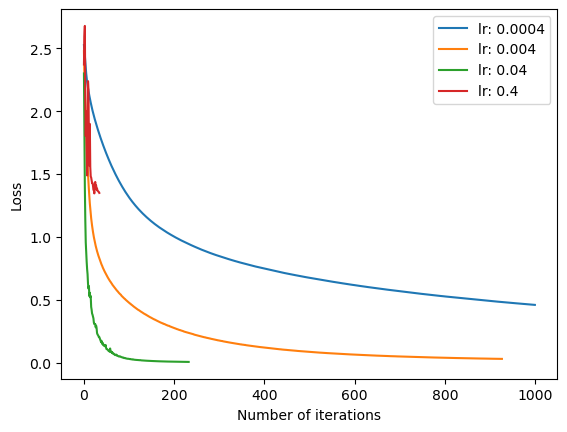

RESULTS FOR NN

Best parameters set found: 
Learning rate:  0.004
Score with best parameters:
0.7826050420168067


In [10]:
lr_list = [4*10**exp for exp in range(-4,0)]
scores = {}

best_hidden_layer_sizes = (28,)
best_batch_size = 200

for lr in lr_list: 
    mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=1000, alpha=0.0001, solver='sgd', tol=0.0001, learning_rate_init=lr, random_state=ID, batch_size=best_batch_size)
    mlp.fit(X_train, y_train)
    scores[lr] = mlp.score(X_test, y_test)
    plt.plot(mlp.loss_curve_, label='lr: ' + str(lr))

plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

print ('RESULTS FOR NN\n')
print("Best parameters set found: ")
best_lr = max(scores, key=scores.get)
print("Learning rate: ", best_lr)

print("Score with best parameters:")
print(scores[best_lr])

**Question A.Q2** Comment about the learning curves (i.e. the variation of the loss over the steps). <br>
How does the curve changes for different learning rates in terms of stability and speed of convergence ?

<div class="alert alert-block alert-info">
**ANSWER A.Q2**:<br>
The most noticeable thing is that with high learning rates (0.4 especially and also 0.04) the optimization is not stable. With a learning rate of 0.4 the solution doesn't even converge to a good (local) minimum. Lower learning rates makes the convergence much more stable but also a lot slower, this is noticeable especially with 0.0004 LR that has not converged yet after 1000 iterations (Giving also the following warning "Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet."). In this case even if the best score is with 0.004 LR also 0.04 looks pretty good with a much faster convergence rate.
    </div>

**TO DO A.5** Now get **training and test error** for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case. <br>
As before, you might get a convergence warning, you can safely ignore it.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.217395


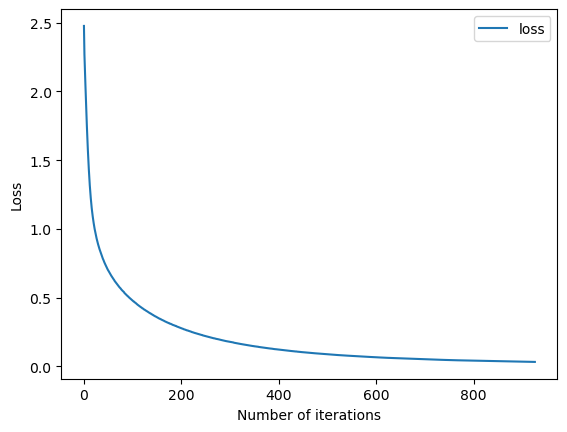

In [11]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=1000, alpha=0.0001, solver='sgd', tol=0.0001, learning_rate_init=best_lr, random_state=ID, batch_size=best_batch_size)
mlp.fit(X_train, y_train)
#Calculate training error
training_error = 1-mlp.score(X_train, y_train)
test_error = 1-mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label="loss")
plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

## B) More data 
Now let's do the same but **using 20000** (or less if it takes too long on your machine) **data points for training**. <br>
Make sure you are **consistent with the choice of `m_training`** in this and the later cells. <br>
Use the **same NN architecture** as before, but you can try more if you like and have a powerful computer!!

In [12]:
X = X[permutation]
y = y[permutation]

m_training = 20000

X_train, X_test = X[0:m_training], X[m_training:]
y_train, y_test = y[0:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [2005 1967 2022 2005 1996 2030 1934 2021 2010 2010]


**TO DO B.1** Train the NNs with the added data points using the optimum parameters found above. <br>
Eventually, feel free to try different architectures if you like. <br>
We suggest that you use `verbose=True` so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50). <br>
This is just for debug purposes, **remember to switch it off** once you found a setup you like. <br>
As before, you might get a convergence warning (especially if you reduced the number of iterations), you can safely ignore it.

In [13]:
mlp_large = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=1000, alpha=0.0001, solver='sgd', tol=0.0001, learning_rate_init=best_lr, random_state=ID, batch_size=best_batch_size,verbose=True)
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1-mlp_large.score(X_train, y_train)
test_error = 1-mlp_large.score(X_test, y_test)
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

Iteration 1, loss = 1.34391283
Iteration 2, loss = 0.79531319
Iteration 3, loss = 0.68350307
Iteration 4, loss = 0.62156418
Iteration 5, loss = 0.58240337
Iteration 6, loss = 0.55418201
Iteration 7, loss = 0.53255247
Iteration 8, loss = 0.51707619
Iteration 9, loss = 0.50319850
Iteration 10, loss = 0.49172368
Iteration 11, loss = 0.48319654
Iteration 12, loss = 0.47426051
Iteration 13, loss = 0.46643369
Iteration 14, loss = 0.46001901
Iteration 15, loss = 0.45472295
Iteration 16, loss = 0.44893566
Iteration 17, loss = 0.44376194
Iteration 18, loss = 0.44006431
Iteration 19, loss = 0.43518325
Iteration 20, loss = 0.43135653
Iteration 21, loss = 0.42743321
Iteration 22, loss = 0.42376925
Iteration 23, loss = 0.41999689
Iteration 24, loss = 0.41699405
Iteration 25, loss = 0.41401838
Iteration 26, loss = 0.41102268
Iteration 27, loss = 0.40859374
Iteration 28, loss = 0.40644547
Iteration 29, loss = 0.40330679
Iteration 30, loss = 0.40081405
Iteration 31, loss = 0.39904228
Iteration 32, los

Iteration 253, loss = 0.21731701
Iteration 254, loss = 0.21586000
Iteration 255, loss = 0.21493399
Iteration 256, loss = 0.21396720
Iteration 257, loss = 0.21446352
Iteration 258, loss = 0.21420998
Iteration 259, loss = 0.21476993
Iteration 260, loss = 0.21252473
Iteration 261, loss = 0.21319561
Iteration 262, loss = 0.21188388
Iteration 263, loss = 0.21166707
Iteration 264, loss = 0.21069072
Iteration 265, loss = 0.20962636
Iteration 266, loss = 0.20987508
Iteration 267, loss = 0.21076199
Iteration 268, loss = 0.20827321
Iteration 269, loss = 0.20875212
Iteration 270, loss = 0.20866522
Iteration 271, loss = 0.20828717
Iteration 272, loss = 0.20728306
Iteration 273, loss = 0.20755670
Iteration 274, loss = 0.20700229
Iteration 275, loss = 0.20667038
Iteration 276, loss = 0.20476066
Iteration 277, loss = 0.20642851
Iteration 278, loss = 0.20426718
Iteration 279, loss = 0.20566404
Iteration 280, loss = 0.20438092
Iteration 281, loss = 0.20467855
Iteration 282, loss = 0.20406822
Iteration 

Iteration 503, loss = 0.13252933
Iteration 504, loss = 0.13236822
Iteration 505, loss = 0.13171118
Iteration 506, loss = 0.13136948
Iteration 507, loss = 0.13192302
Iteration 508, loss = 0.13017819
Iteration 509, loss = 0.13100275
Iteration 510, loss = 0.13033662
Iteration 511, loss = 0.13097841
Iteration 512, loss = 0.13119912
Iteration 513, loss = 0.12931084
Iteration 514, loss = 0.12915301
Iteration 515, loss = 0.12809990
Iteration 516, loss = 0.12991388
Iteration 517, loss = 0.12692592
Iteration 518, loss = 0.12769482
Iteration 519, loss = 0.12952462
Iteration 520, loss = 0.12817476
Iteration 521, loss = 0.12851179
Iteration 522, loss = 0.12784621
Iteration 523, loss = 0.12812545
Iteration 524, loss = 0.12788498
Iteration 525, loss = 0.12651293
Iteration 526, loss = 0.12873361
Iteration 527, loss = 0.12610404
Iteration 528, loss = 0.12652568
Iteration 529, loss = 0.12512195
Iteration 530, loss = 0.12597472
Iteration 531, loss = 0.12518988
Iteration 532, loss = 0.12554655
Iteration 

Iteration 753, loss = 0.08265140
Iteration 754, loss = 0.08427570
Iteration 755, loss = 0.08249388
Iteration 756, loss = 0.08518449
Iteration 757, loss = 0.08286861
Iteration 758, loss = 0.08602729
Iteration 759, loss = 0.08372509
Iteration 760, loss = 0.08418479
Iteration 761, loss = 0.08260397
Iteration 762, loss = 0.08176245
Iteration 763, loss = 0.08334852
Iteration 764, loss = 0.08284983
Iteration 765, loss = 0.08249716
Iteration 766, loss = 0.08308742
Iteration 767, loss = 0.08217623
Iteration 768, loss = 0.08287869
Iteration 769, loss = 0.08178249
Iteration 770, loss = 0.08266426
Iteration 771, loss = 0.08092892
Iteration 772, loss = 0.08113191
Iteration 773, loss = 0.08181025
Iteration 774, loss = 0.08054202
Iteration 775, loss = 0.07975155
Iteration 776, loss = 0.08031717
Iteration 777, loss = 0.08131646
Iteration 778, loss = 0.08090857
Iteration 779, loss = 0.07946736
Iteration 780, loss = 0.08081689
Iteration 781, loss = 0.08196893
Iteration 782, loss = 0.08022406
Iteration 

**Question B.Q1** Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Comment about the results you obtained.

<div class="alert alert-block alert-info">
**ANSWER B.Q1**:<br>
    <b>500 Samples</b><br>
    Best NN training error: 0.000000<br>
    Best NN test error: 0.217395<br>
    <b>20000 Samples</b><br>
    NN training error: 0.018600 <br>
    NN test error: 0.156600 <br>

<p> With only 500 samples the training error was 0 while with 20000 was 1.8%. The test error with 20000 samples was  15.6% while the test error with 500 samples was about 5% more (21.7%). Considered this I can say that the model obtained with 500 samples overfitted on training data while the model obtained with 20000 had a larger error on training data but learned to generalize better the solution. </p>
</div>

**TO DO B.2** Plot an example that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=20000 training data points.

INPUT:


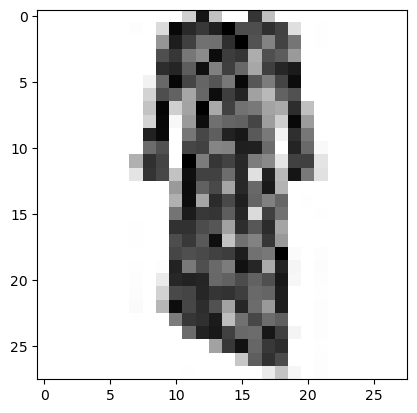

LABEL: 3
NN prediction for m=500: 1
NN prediction for m=20000: 3


In [14]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

for i, (p, pl, l) in enumerate(zip(NN_prediction, large_NN_prediction, y_test)):
    if p != l and pl == l:
        plot_input(X_test, y_test, i)
        print("NN prediction for m=500:", p)
        print("NN prediction for m=20000:", pl)
        break

**TO DO B.3** Plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 20000 data points. <br>
Note that the code is provided, you just need to change the `mlp` variable name to the one used before - if you changed it.  

Weights with 500 data points:


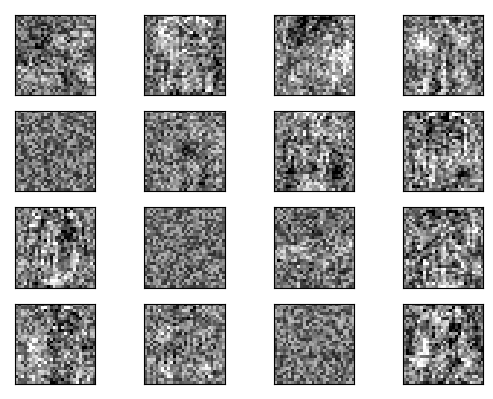

Weights with 20000 data points:


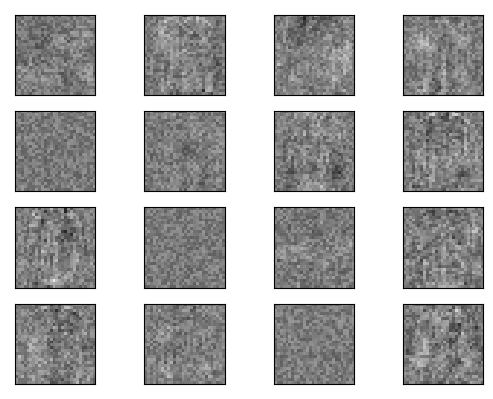

In [15]:
print("Weights with 500 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 20000 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

**Question B.Q2** Describe what do you observe by looking at the weights

<div class="alert alert-block alert-info">
**ANSWER B.Q2**:<br>
In the 500 datapoint weight plot we can see that some specific weight are much more weightful than others (and also some distributions of the weights looks kinda like some training images). With 20000 training points it seems all the weights are used better and the feature were learned instead of the input distribution.

**TO DO B.4** Create a SVM classifier with the following parameters: `kernel='rbf', C=10, gamma=0.01`. <br>
Fit it on a few data points and compute its training and test scores.

In [16]:
m_training = 1000

X_train, X_test = X[0:m_training], X[m_training:]
y_train, y_test = y[0:m_training], y[m_training:]

# best parameters found in the SVM notebook
SVM = SVC(C=10, kernel='rbf', gamma=0.01, random_state=ID)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')
SVM_training_error = 1-SVM.score(X_train, y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1-SVM.score(X_test, y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.0030000000000000027
Test error SVM:
0.17835593220338986


**Question B.Q3** Compare the results of SVM and of NN. Which one achieves the best performances? 

<div class="alert alert-block alert-info">
**ANSWER B.Q3**:<br>
<h1>SVM SCORES</h1>
<b>1000 training points</b></br>
Training error SVM: 0.0030000000000000027</br>
Test error SVM: 0.17835593220338986</br>
<b>10000 training points</b></br>
Training error SVM: 0.017100000000000004</br>
Test error SVM: 0.122</br>
<b>20000 training points</b></br>
Training error SVM: 0.022599999999999953</br>
Test error SVM: 0.10870000000000002</br>
<h1>BEST NN SCORE</h1>
NN training error: 0.018600
NN test error: 0.156600

<p>I tried to test SVM with different training set sizes as can be seen above. SVM trained with 1k points has already a close error to NN trained with 20k. Using more training data on SVM further improved prediction performances. Another important thing to say is that that the training time for SVM (With the same amount of training data) has been double the time of NN training time (With 20k training samples NN took 2 min 29 sec while SVM took 4 min 40 sec)</p>

</div>